### Importing libraries

In [28]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Read Dataset

In [ ]:
df = pd.read_csv('Cars.csv')

In [4]:
df[['year','age','engine']] = df[['year','age','engine']].astype('int')

### How data looks like?

In [5]:
df.sample(5)

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
7437,6.25,2015,33066,19.00,1199,88.70,8,HONDA,JAZZ 1.2 S AT I VTEC,0,0,0,0,0,1,0,1,0
9173,6.75,2017,62320,28.09,1248,88.50,6,MARUTI,CIAZ VDI OPTION SHVS,0,0,1,0,0,0,1,1,0
8737,9.50,2019,50000,25.50,1498,98.60,4,HONDA,WR-V I-DTEC VX,1,0,1,0,0,0,1,1,0
7279,5.60,2013,74000,22.32,1582,126.32,10,HYUNDAI,VERNA 1.6 SX,0,0,1,0,0,0,1,1,0
3576,3.99,2010,64400,13.70,1798,157.75,13,SKODA,SUPERB ELEGANCE 1.8 TSI AT,0,0,0,0,0,1,0,1,0


### Shape of the data

In [6]:
df.shape

(19820, 18)

### Summery of the columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  int64  
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  int64  
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  int64  
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

### Checking for the null values

In [8]:
df.isna().sum()

selling_price       0
year                0
km_driven           0
mileage             0
engine              0
max_power           0
age                 0
make                0
model               0
Individual          0
Trustmark Dealer    0
Diesel              0
Electric            0
LPG                 0
Petrol              0
Manual              0
5                   0
>5                  0
dtype: int64

### How data mathematically looks?

In [9]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,age,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
count,19820.000000,19820.000000,1.982000e+04,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000
mean,6.585509,2014.561453,5.815856e+04,19.503402,1475.701060,98.122907,8.438547,0.390666,0.009586,0.492583,0.000404,0.003229,0.487841,0.802674,0.835015,0.152825
std,4.847364,3.196636,5.171563e+04,4.297784,518.571222,44.761727,3.196636,0.487912,0.097442,0.499958,0.020087,0.056734,0.499865,0.397990,0.371176,0.359828
min,0.300000,1992.000000,1.000000e+02,4.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.410000,2013.000000,3.100000e+04,16.950000,1197.000000,73.900000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,5.200000,2015.000000,5.200000e+04,19.300000,1248.000000,86.800000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,20.902500,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There the 2 categorical series 

### Checking for Outliers

In [10]:
df_num = df.drop(df.select_dtypes('object'), axis=1)

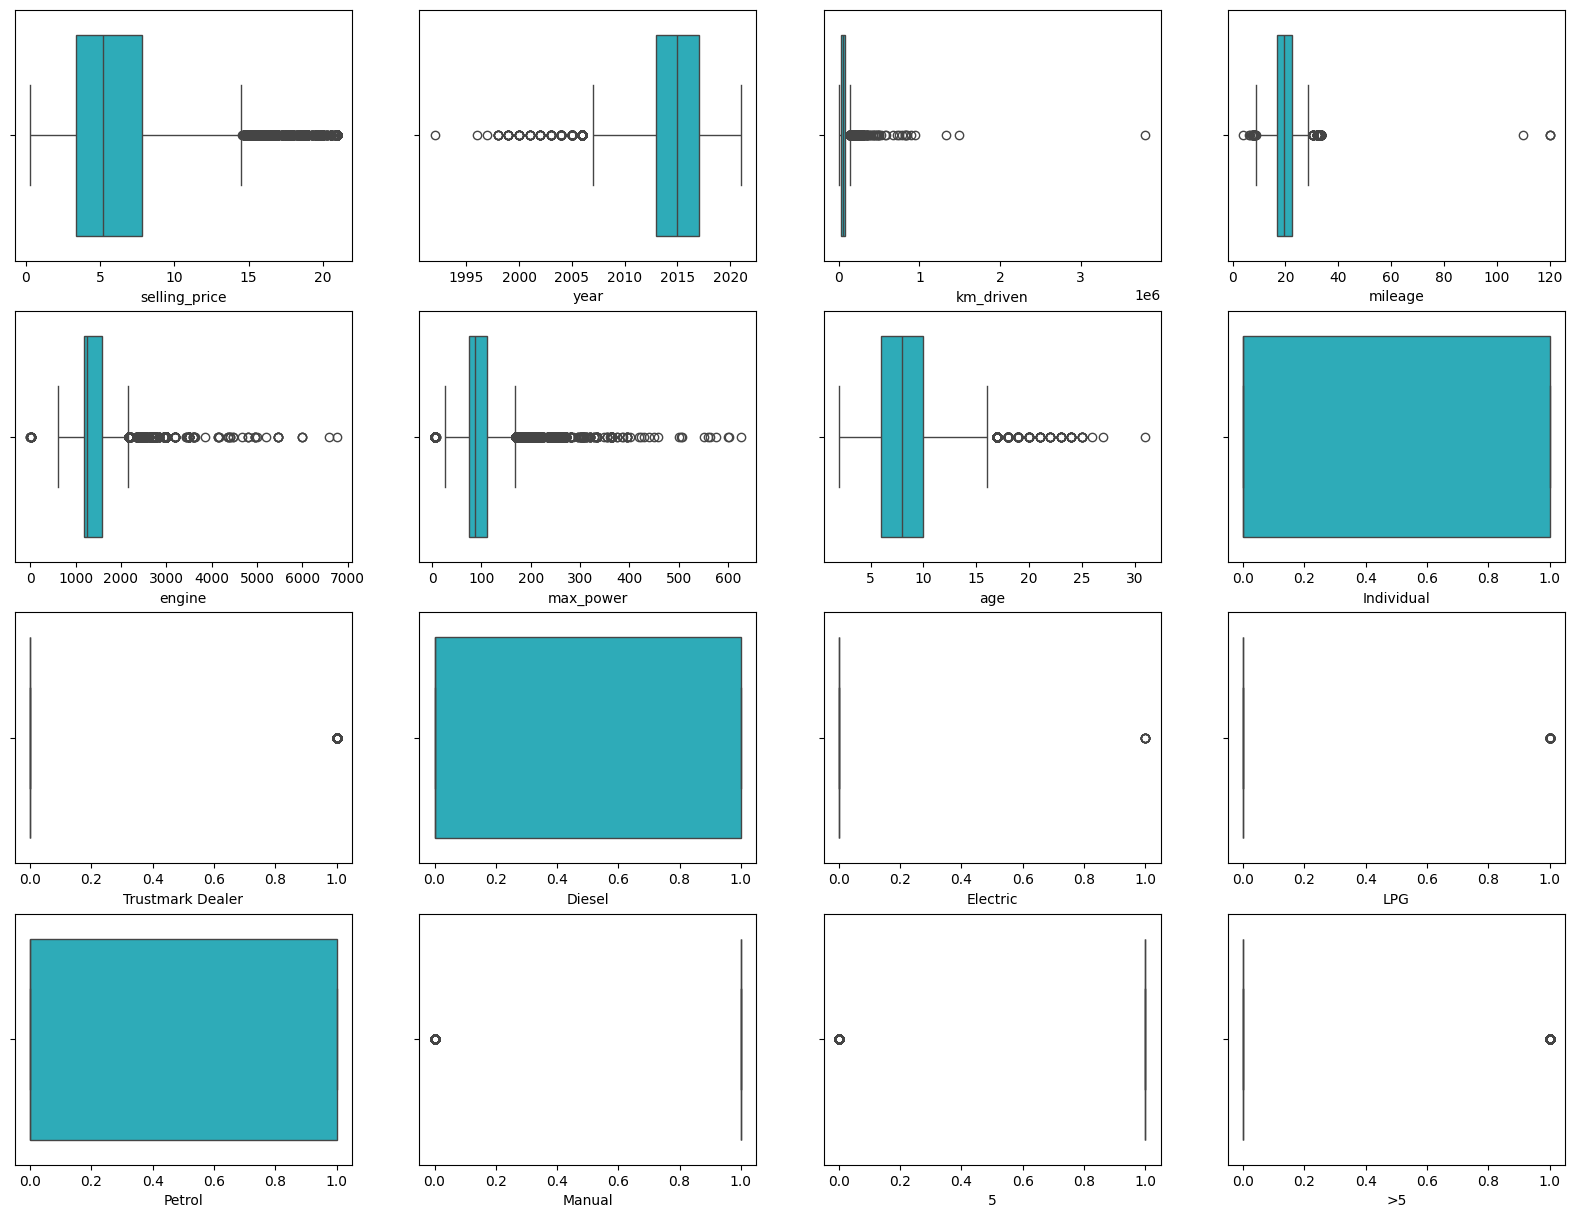

In [11]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df_num.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df[col], color='C9')
plt.show()

In [12]:
data = df.drop(['selling_price','model','make','Trustmark Dealer','Electric','LPG','Manual','5','>5'], axis=1)

In [13]:
data.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age',
       'Individual', 'Diesel', 'Petrol'],
      dtype='object')

In [14]:
# treatment of outliers 
threshold = 1.5
for colos in data.columns:

    # finding q1, q3 and IQR
    q1 = df[colos].quantile(0.25)
    q3 = df[colos].quantile(0.75)
    IQR = q3 - q1

    # finding upper wisker and lower wisker
    upper_wisker = q3 + threshold * IQR
    lower_wisker = q1 - threshold * IQR

    # capping the outliers
    df[colos] = df[colos].clip(lower=lower_wisker, upper=upper_wisker)

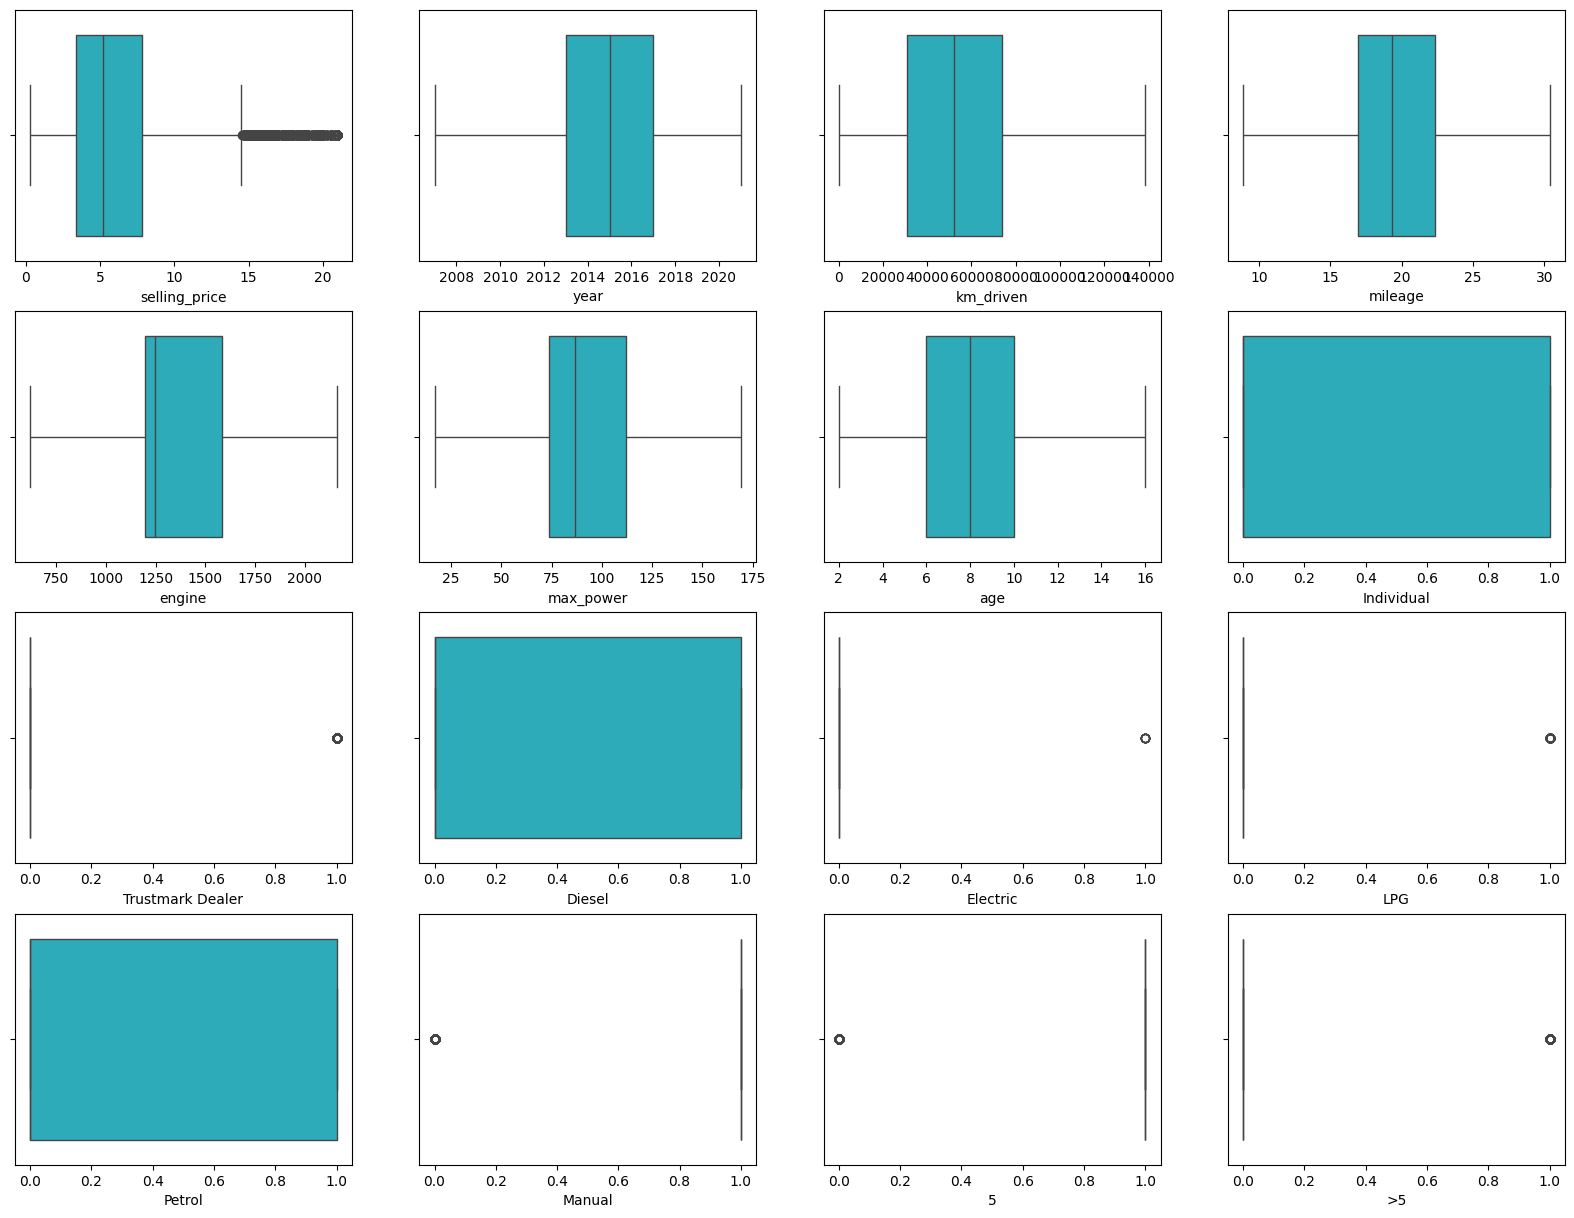

In [15]:
# checking for outliers after treatment
plt.figure(figsize=(20,15))
for i,col in enumerate(df_num.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df[col], color='C9')
plt.show()

In [16]:
df['make'].unique()

array(['MARUTI', 'HYUNDAI', 'FORD', 'MAHINDRA', 'TATA', 'RENAULT',
       'NISSAN', 'MINI', 'MERCEDES-BENZ', 'TOYOTA', 'FIAT', 'VOLKSWAGEN',
       'HONDA', 'CHEVROLET', 'AMBASSADOR', 'DATSUN', 'KIA', 'BMW',
       'MITSUBISHI', 'AUDI', 'SKODA', 'LAND', 'JAGUAR', 'DAEWOO',
       'BENTLEY', 'MG', 'ISUZU', 'PORSCHE', 'VOLVO', 'LEXUS', 'JEEP',
       'PREMIER', 'MASERATI', 'FORCE', 'LAMBORGHINI', 'FERRARI',
       'OPELCORSA', 'MERCEDES-AMG', 'DC', 'ROLLS-ROYCE', 'OPEL'],
      dtype=object)

In [17]:
df['make'].nunique()

41

In [18]:
df['model'].unique()

array(['ALTO STD', 'GRAND I10 ASTA', 'I20 ASTA', ...,
       'SAFARI 2005-2017 DICOR 2.2 GX 4X2',
       'ECOSPORT 2015-2021 SIGNATURE EDITION PETROL BSIV',
       'YARIS V OPTIONAL CVT BSIV'], dtype=object)

In [19]:
df['model'].nunique()

3233

#### Here, we won't use **OneHotEncoder**  bcz there are too many unique values so, there will be ndim columns
#### That's why we use <b>TargetEncoder</b>

In [24]:
# Columns to encode
categorical_columns = ["make", "model"] 

# Dictionary to store encoded values
target_encodings = {}

for col in categorical_columns:
    encoding = df.groupby(col)["selling_price"].mean().to_dict()  # Target Encoding
    target_encodings[col] = encoding
    df[col] = df[col].map(encoding)

In [29]:
# Save as pickle file
with open("car_encoder.pkl", "wb") as f:
    pickle.dump(target_encodings, f)

In [30]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012,120000,19.70,796.0,46.30,11,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016,20000,18.90,1197.0,82.00,7,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010,60000,17.00,1197.0,80.00,13,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012,37000,20.92,998.0,67.10,11,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015,30000,22.77,1498.0,98.59,8,5.858258,6.777576,0,0,1,0,0,0,1,1,0


### Corelation of the data

In [25]:
df.corr()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
selling_price,1.000000,0.392690,-0.159442,-0.330491,0.657863,0.775655,-0.392690,0.742042,0.789642,-0.201808,-0.019547,0.335236,0.019073,-0.053388,-0.313570,-0.582019,-0.234645,0.223282
year,0.392690,1.000000,-0.474816,0.278571,-0.052076,0.093121,-1.000000,-0.021060,0.284735,-0.006445,0.064815,0.017584,0.004238,-0.076316,-0.016812,-0.108104,-0.007978,0.023971
km_driven,-0.159442,-0.474816,1.000000,-0.109470,0.237125,0.037534,0.474816,0.035799,-0.035939,0.128863,-0.072519,0.359966,-0.002355,0.026234,-0.361884,0.124287,-0.168209,0.191370
mileage,-0.330491,0.278571,-0.109470,1.000000,-0.600181,-0.509480,-0.278571,-0.423783,-0.334533,0.075848,0.026460,0.122054,0.026326,-0.024472,-0.162617,0.287174,0.396826,-0.401206
engine,0.657863,-0.052076,0.237125,-0.600181,1.000000,0.812709,0.052076,0.635340,0.654613,-0.118948,-0.055003,0.517963,0.003566,-0.057660,-0.485200,-0.368405,-0.490361,0.511547
max_power,0.775655,0.093121,0.037534,-0.509480,0.812709,1.000000,-0.093121,0.675329,0.705832,-0.201352,-0.032368,0.314649,-0.002070,-0.063546,-0.278668,-0.530034,-0.248499,0.253614
age,-0.392690,-1.000000,0.474816,-0.278571,0.052076,-0.093121,1.000000,0.021060,-0.284735,0.006445,-0.064815,-0.017584,-0.004238,0.076316,0.016812,0.108104,0.007978,-0.023971
make,0.742042,-0.021060,0.035799,-0.423783,0.635340,0.675329,0.021060,1.000000,0.596778,-0.194061,-0.033816,0.271655,0.013570,-0.027623,-0.253309,-0.552083,-0.149485,0.125040
model,0.789642,0.284735,-0.035939,-0.334533,0.654613,0.705832,-0.284735,0.596778,1.000000,-0.147357,-0.027004,0.386189,0.018337,-0.017072,-0.369566,-0.489619,-0.280883,0.281301
Individual,-0.201808,-0.006445,0.128863,0.075848,-0.118948,-0.201352,0.006445,-0.194061,-0.147357,1.000000,-0.078776,0.014671,-0.005793,0.030982,-0.007934,0.217977,-0.049738,0.056523


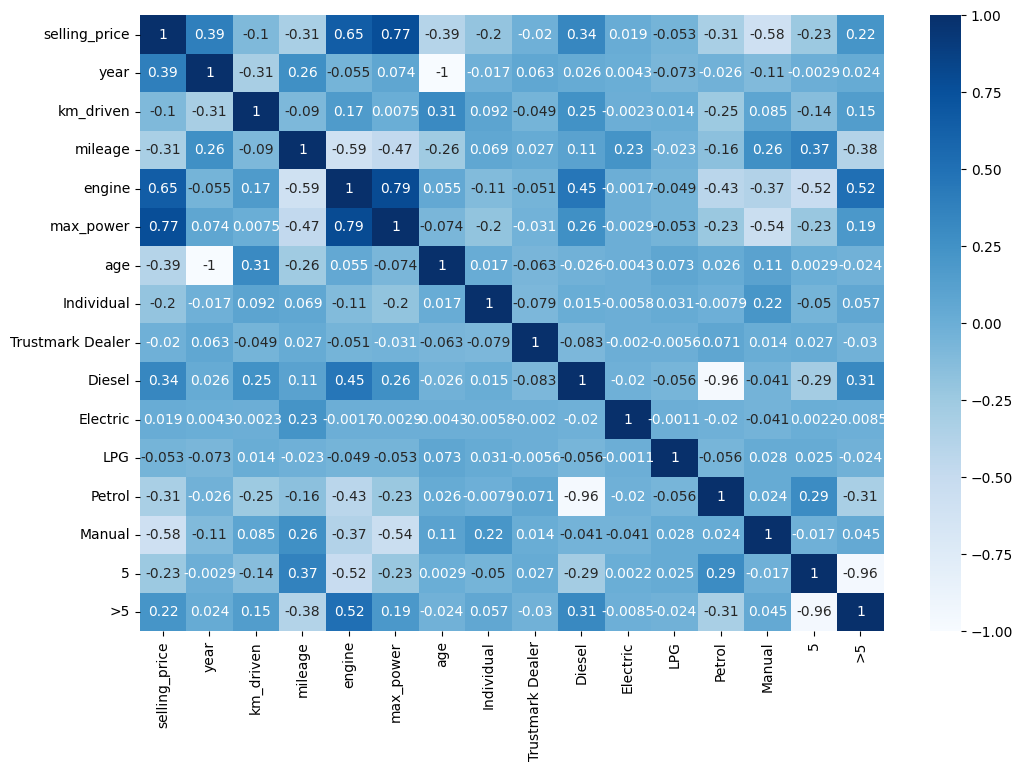

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), cmap='Blues', annot=True)
plt.show()

In [27]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012,120000,19.70,796.0,46.30,11,4.684721,5.235537,1,0,0,0,0,1,1,1,0
1,5.50,2016,20000,18.90,1197.0,82.00,7,5.458819,5.527772,1,0,0,0,0,1,1,1,0
2,2.15,2010,60000,17.00,1197.0,80.00,13,5.458819,5.380584,1,0,0,0,0,1,1,1,0
3,2.26,2012,37000,20.92,998.0,67.10,11,4.684721,2.268993,1,0,0,0,0,1,1,1,0
4,5.70,2015,30000,22.77,1498.0,98.59,8,5.858258,6.736442,0,0,1,0,0,0,1,1,0


### Divide data into feature columns and target column

In [29]:
x = df.drop('selling_price', axis=1)
y = df['selling_price']

### Split the data into train and test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
x_train.shape, y_train.shape

((15856, 17), (15856,))

In [33]:
x_test.shape, y_test.shape

((3964, 17), (3964,))

### Scale the data

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[-0.52450048,  0.74931649,  0.26489961, ...,  0.49682486,
         0.44338351, -0.42377632],
       [-1.50525598,  1.29492642, -0.84474633, ..., -2.01278171,
         0.44338351, -0.42377632],
       [ 1.11009201,  0.56275129,  1.96536374, ...,  0.49682486,
         0.44338351, -0.42377632],
       ...,
       [-0.19758199,  1.43124339, -0.04292164, ...,  0.49682486,
         0.44338351, -0.42377632],
       [ 0.45625501,  0.44872885, -0.41528605, ...,  0.49682486,
         0.44338351, -0.42377632],
       [-0.19758199,  1.06025849, -1.84268295, ...,  0.49682486,
        -2.25538383,  2.35973543]])

In [36]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[ 0.78317351,  0.74931649,  0.53796684, ...,  0.49682486,
         0.44338351, -0.42377632],
       [ 0.12933651,  0.17407378,  0.16560243, ...,  0.49682486,
         0.44338351, -0.42377632],
       [ 0.45625501,  0.48190637,  1.94302188, ...,  0.49682486,
         0.44338351, -0.42377632],
       ...,
       [-1.83217448, -0.18350952, -0.14221881, ...,  0.49682486,
         0.44338351, -0.42377632],
       [-1.50525598, -0.18350952, -0.48975893, ...,  0.49682486,
         0.44338351, -0.42377632],
       [ 1.763929  , -1.27180653,  0.5429317 , ...,  0.49682486,
         0.44338351, -0.42377632]])

In [61]:
# Save Scaler as pickle file
with open("car_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

### Fit the scaled data in dataset

In [37]:
x_train[x_train.columns] = x_train_scaled

In [38]:
x_train

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
5662,-0.524500,0.749316,0.264900,0.436514,0.246005,0.524500,-0.282719,-0.136952,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
4556,-1.505256,1.294926,-0.844746,1.448103,2.165947,1.505256,3.074888,0.686431,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
7094,1.110092,0.562751,1.965364,-0.455316,-0.620970,-1.110092,-0.525990,0.239186,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1441,1.437011,-1.271807,1.084101,-0.580172,-0.328073,-1.437011,-0.612293,0.105430,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
17079,-2.159093,1.682142,-1.482731,0.948679,1.019254,2.159093,-0.157727,-0.606232,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.129337,-0.743205,0.811034,-1.607051,-1.403006,-0.129337,-0.525990,-1.773412,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
11964,1.110092,-1.615584,0.257452,-1.092337,-0.825998,-1.110092,-0.525990,-0.560478,-0.799289,10.032000,-0.984977,-0.019456,-0.056244,1.026590,-2.012782,0.443384,-0.423776
5390,-0.197582,1.431243,-0.042922,-0.455316,-0.623899,0.197582,-0.525990,-0.495951,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
860,0.456255,0.448729,-0.415286,0.179157,0.647275,-0.456255,-0.157727,0.532453,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [39]:
x_test[x_test.columns] = x_test_scaled
x_test

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
960,0.783174,0.749316,0.537967,0.087426,-0.304641,-0.783174,-0.548188,-0.041574,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
4073,0.129337,0.174074,0.165602,0.181705,-0.187482,-0.129337,-0.282719,-0.445461,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
4339,0.456255,0.481906,1.943022,0.181705,0.099557,-0.456255,-0.157727,0.074689,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
19325,0.456255,-0.792583,-0.191867,-0.580172,-0.190411,-0.456255,-0.157727,0.058513,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
438,-0.851419,0.127432,0.359232,-1.092337,-0.823069,0.851419,-0.525990,-1.961074,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12402,-0.524500,-0.867582,-0.018097,-0.582720,-0.246062,0.524500,-0.157727,-1.415045,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
12460,0.129337,0.127432,-2.500527,1.458296,2.165947,-0.129337,3.872400,1.113641,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,-2.012782,0.443384,-0.423776
11335,-1.832174,-0.183510,-0.142219,-0.931808,-0.825998,1.832174,-0.525990,-1.419625,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
13071,-1.505256,-0.183510,-0.489759,-0.585269,-0.275352,1.505256,-0.525990,-0.298094,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


### Modeling

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [42]:
x_pred = model.predict(x_train)
x_pred

array([ 5.32254871, 14.13472156,  6.15403181, ...,  4.00482873,
        7.60766388,  8.01461523])

In [43]:
model.coef_

array([ 0.69823651, -0.32160031, -0.25114553, -0.05112058,  1.28706414,
       -0.69823651,  1.64656527,  1.02810025, -0.10311566, -0.03872903,
        0.19612306,  0.03257238,  0.00538476, -0.29727433, -0.42744376,
       -0.45308433, -0.3461624 ])

In [44]:
model.intercept_

np.float64(6.578468924697287)

In [45]:
y_pred = model.predict(x_test)
y_pred

array([ 6.05017486,  5.79490016,  6.81605393, ..., -0.11745038,
        2.27041391,  9.57408493])

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
train_mse = mean_squared_error(y_train, x_pred, squared=False)
train_mse

np.float64(1.8386880201247184)

In [48]:
test_mse = mean_squared_error(y_test, y_pred, squared=False)
test_mse

np.float64(1.8198927776273484)

R2 score

In [49]:
round(model.score(x_train, y_train),2)*100

86.0

In [50]:
round(model.score(x_test, y_test),2)*100

86.0

In [51]:
# save the model
with open("cars_price.pkl", "wb") as file:
    pickle.dump(model, file)

In [53]:
import joblib

In [54]:
# Load the model
with open('cars_price.pkl', 'rb') as file:
    model = joblib.load(file)